# L'illusion des statistiques sommaires : un danger pour tes analyses de données

[Lien du post MonShotData](https://www.monshotdata.com/p/statistiques-sommaires-un-danger-pour-tes-analyses-de-donnees)

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.datasets import make_circles, make_blobs

sns.set()

plt.rcParams['font.family'] = ['Comic Sans MS', 'sans-serif']
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
color_scatter = '#153C4f'
color_reg = '#e3a3ac'
color_edge = '#FAF9F6'

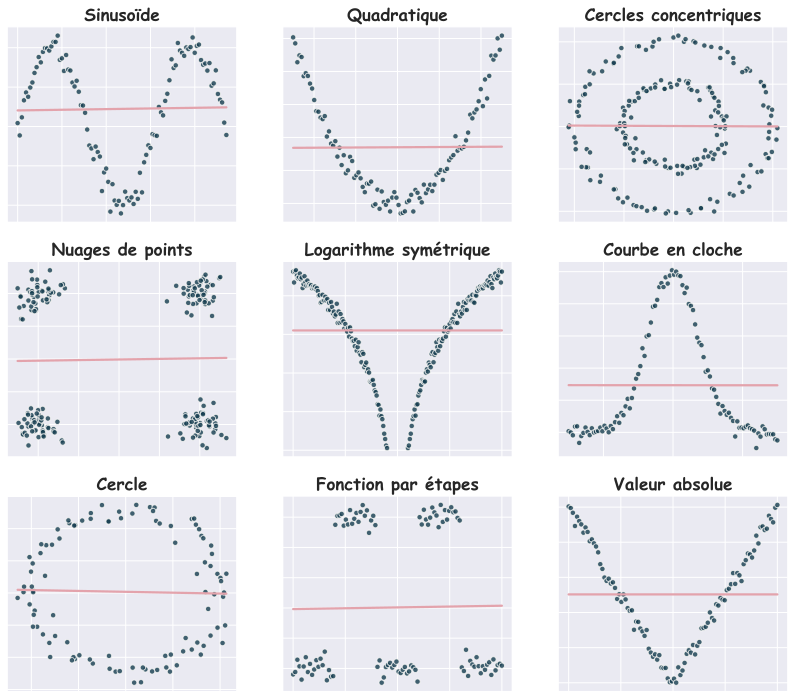

In [4]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

fig, ax = plt.subplots(3,3, figsize = (14, 12))

X = np.linspace(0, 3*np.pi, num=100)
Y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)
sns.regplot(x = X, y = Y, ax = ax[0][0], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)

X = np.linspace(-5, 5, num=100)
Y = X**2 + np.random.normal(0, 1, size=X.shape)
sns.regplot(x = X, y = Y, ax = ax[0][1], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)

X, y = make_circles(n_samples=200, noise=0.04, random_state=42, factor=0.5)
sns.regplot(x = X[:, 0], y = X[:, 1], ax = ax[0][2], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)

X_inner = X[y == 1]
sns.regplot(x = X_inner[:, 0], y = X_inner[:, 1], ax = ax[2][0], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)


X = np.linspace(1, 10, num=100)
Y = np.log(X) + np.random.normal(0, 0.05, size=X.shape)
X = np.concatenate((-X[::-1], X))
Y = np.concatenate((Y[::-1], Y))
sns.regplot(x = X, y = Y, ax = ax[1][1], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)


X = np.linspace(-3, 3, num=100)
Y = np.exp(-X**2) + np.random.normal(0, 0.03, len(X))
sns.regplot(x = X, y = Y, ax = ax[1][2], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)


# Générer un ensemble de données avec quatre blobs situés à (+-2,+-2)
centers = [(2, 2), (-2, -2), (-2, 2), (2, -2)]
X, y = make_blobs(n_samples=200, centers=centers, cluster_std=0.3)
sns.regplot(x = X[:, 0], y = X[:, 1], ax = ax[1][0], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)

X = np.linspace(0, 4, num=100)
Y = np.concatenate([np.zeros(20), np.ones(20), np.zeros(20), np.ones(20), np.zeros(20)]) + np.random.normal(0, 0.05, size=X.shape)
sns.regplot(x = X, y = Y, ax = ax[2][1], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)

# Générer un ensemble de données avec une relation de valeur absolue
X = np.linspace(-1, 1, num=100)
Y = np.abs(X + np.random.normal(0, 0.03, size=X.shape)) 
sns.regplot(x = X, y = Y, ax = ax[2][2], scatter_kws={'s':30, 'color':color_scatter, 'edgecolor':color_edge}, 
            line_kws={"color":color_reg}, scatter = True, fit_reg = True, ci = None)


ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[0][2].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[1][2].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])
ax[2][2].set_xticklabels([])

ax[0][0].set_yticklabels([])
ax[0][1].set_yticklabels([])
ax[0][2].set_yticklabels([])
ax[1][0].set_yticklabels([])
ax[1][1].set_yticklabels([])
ax[1][2].set_yticklabels([])
ax[2][0].set_yticklabels([])
ax[2][1].set_yticklabels([])
ax[2][2].set_yticklabels([])

ax[0][0].set_title("Sinusoïde", fontsize = 17, fontweight = "bold")
ax[0][1].set_title("Quadratique", fontsize = 17, fontweight = "bold")
ax[0][2].set_title("Cercles concentriques", fontsize = 17, fontweight = "bold")
ax[1][0].set_title("Nuages de points", fontsize = 17, fontweight = "bold")
ax[1][1].set_title("Logarithme symétrique", fontsize = 17, fontweight = "bold")
ax[1][2].set_title("Courbe en cloche", fontsize = 17, fontweight = "bold")
ax[2][0].set_title("Cercle", fontsize = 17, fontweight = "bold")
ax[2][1].set_title("Fonction par étapes", fontsize = 17, fontweight = "bold")
ax[2][2].set_title("Valeur absolue", fontsize = 17, fontweight = "bold")

plt.show();